    JACOB KNOPPING
    1/30/2020
    
    22.3 DRILL: GRADIENT BOOSTING
    
### Starter Code

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


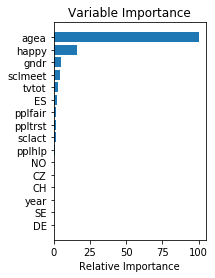

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

### Solution

In [5]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [6]:
X.corr()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
year,1.000000,-0.031596,-0.001600,0.004283,-0.032901,-0.013378,-0.028502,0.012150,0.001355,-0.003520,0.003218,0.001472,0.002100,-0.006935,0.001012,0.002085
tvtot,-0.031596,1.000000,-0.142422,-0.119277,-0.069080,-0.118598,-0.078864,-0.092375,0.017922,0.257674,-0.173825,0.218606,0.004144,0.035985,-0.017619,-0.050075
ppltrst,-0.001600,-0.142422,1.000000,0.597506,0.459250,0.231533,0.122555,0.137491,-0.029921,-0.029412,0.031936,-0.225021,-0.009180,-0.152500,0.217530,0.132684
pplfair,0.004283,-0.119277,0.597506,1.000000,0.480931,0.247755,0.096501,0.128808,0.022251,0.014724,0.058250,-0.215494,0.005904,-0.188744,0.191488,0.161542
pplhlp,-0.032901,-0.069080,0.459250,0.480931,1.000000,0.215323,0.080489,0.092673,0.042046,0.040351,0.079003,-0.166372,0.003274,-0.223920,0.153183,0.173921
happy,-0.013378,-0.118598,0.231533,0.247755,0.215323,1.000000,0.182944,0.192030,-0.022413,-0.042970,0.110593,-0.206445,-0.003884,-0.074060,0.100777,0.063745
sclmeet,-0.028502,-0.078864,0.122555,0.096501,0.080489,0.182944,1.000000,0.283319,0.009533,-0.194443,-0.021595,-0.174738,-0.022014,0.011601,0.070484,0.097158
sclact,0.012150,-0.092375,0.137491,0.128808,0.092673,0.192030,0.283319,1.000000,-0.031648,-0.059442,-0.004271,-0.038131,0.003764,-0.107427,0.080589,0.080040
gndr,0.001355,0.017922,-0.029921,0.022251,0.042046,-0.022413,0.009533,-0.031648,1.000000,0.020598,0.013925,0.024788,0.011096,0.007807,-0.027735,-0.019075
agea,-0.003520,0.257674,-0.029412,0.014724,0.040351,-0.042970,-0.194443,-0.059442,0.020598,1.000000,-0.015258,-0.033002,0.030541,0.010583,-0.023270,0.048733


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


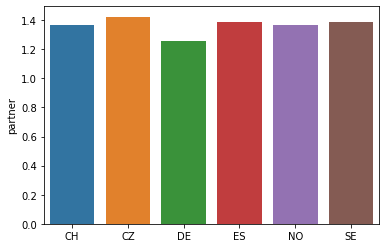

In [8]:
import seaborn as sns

countries = list(df['cntry'].unique())

sns.barplot(x=countries, y=df.groupby('cntry')['partner'].mean())


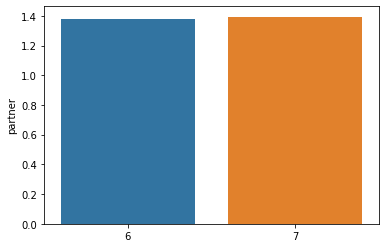

In [9]:
years = list(df['year'].unique())

sns.barplot(x=years, y=df.groupby('year')['partner'].mean())

This confirms we can drop country, and year with little information loss.

In [10]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = X.drop('cntry', axis=1)
X = X.drop('year', axis=1)


# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [11]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.046644844517184945
Percent Type II errors: 0.17689579923622475

Test set accuracy:
Percent Type I errors: 0.06012269938650307
Percent Type II errors: 0.19386503067484662


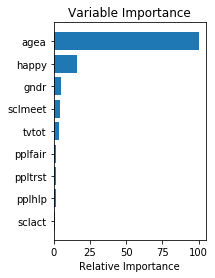

In [12]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Errors are essentially the same, but we reduced the amount of features to obtain the same results.

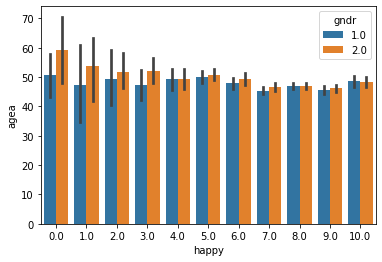

In [13]:
sns.barplot(x='happy', y='agea', hue='gndr', data=df)

In [14]:
#Add new feature for people who are sad
def is_sad(x):
    if x <= 3:
        return 1
    else:
        return 0

df['is_sad'] = df['happy'].apply(is_sad)

In [15]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,is_sad
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,0


In [16]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = X.drop('cntry', axis=1)
X = X.drop('year', axis=1)


# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [17]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.046644844517184945
Percent Type II errors: 0.17689579923622475

Test set accuracy:
Percent Type I errors: 0.06012269938650307
Percent Type II errors: 0.19386503067484662


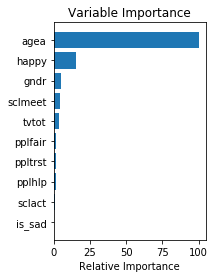

In [18]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Adding a new feature (is_sad) did not provide useful information.

Now we will define a function that adjusts the paramaters to see if there is a more accurate set of parameters to use:

In [19]:
#first, re-set the datafram back to the original:

df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [20]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
    
#now we will recycle code from earlier inside a function

def adjust_parameters(X, y, n_estimators, max_depth, loss):
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    # Initialize and fit the model.
    params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'loss': loss}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

    print((
        'Training set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n\n'
        'Test set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}'
    ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

In [21]:
#Original:

# params = {'n_estimators': 500,
#         'max_depth': 2,
#         'loss': 'deviance'}

#Training set accuracy:
#Percent Type I errors: 0.04650845608292417
#Percent Type II errors: 0.17607746863066012

#Test set accuracy:
#Percent Type I errors: 0.06257668711656442
#Percent Type II errors: 0.18527607361963191

#### Ajusting n_estimators

In [22]:
adjust_parameters(X, y, 100, 2, 'deviance')

Training set accuracy:
Percent Type I errors: 0.040098199672667756
Percent Type II errors: 0.1972176759410802

Test set accuracy:
Percent Type I errors: 0.049079754601226995
Percent Type II errors: 0.20613496932515338


Reduced type I errors, but increased type II.

In [23]:
adjust_parameters(X, y, 1000, 2, 'deviance')

Training set accuracy:
Percent Type I errors: 0.04609929078014184
Percent Type II errors: 0.17103109656301146

Test set accuracy:
Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.18895705521472392


Increased both type I and type II errors.

#### Adjusting max_depth:

In [26]:
adjust_parameters(X, y, 500, 3, 'deviance')

Training set accuracy:
Percent Type I errors: 0.03832515002727769
Percent Type II errors: 0.15698308783415166

Test set accuracy:
Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.18895705521472392


In [27]:
adjust_parameters(X, y, 500, 4, 'deviance')

Training set accuracy:
Percent Type I errors: 0.02414075286415712
Percent Type II errors: 0.12575013638843427

Test set accuracy:
Percent Type I errors: 0.08957055214723926
Percent Type II errors: 0.18159509202453988


Increasing the max_depth paramters leads to overfitting here. The errors go down in the training set, but go up in the test set.

In [28]:
adjust_parameters(X, y, 500, 1, 'deviance')

Training set accuracy:
Percent Type I errors: 0.046235679214402615
Percent Type II errors: 0.1987179487179487

Test set accuracy:
Percent Type I errors: 0.049079754601226995
Percent Type II errors: 0.20736196319018405


Decreasing max_depth to 1 also led to an increase in errors.

#### Adjusting max_depth:

In [29]:
adjust_parameters(X, y, 500, 2, 'exponential')

Training set accuracy:
Percent Type I errors: 0.04773595199127114
Percent Type II errors: 0.1793507910529187

Test set accuracy:
Percent Type I errors: 0.06748466257668712
Percent Type II errors: 0.19141104294478528


Led to an increase in errors

#### Adding and adjusting subsamples

In [32]:
def adjust_parameters2(X, y, n_estimators, max_depth, loss, subsample):
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    # Initialize and fit the model.
    params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'loss': loss,
          'subsample': subsample}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    print((
        'Training set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n\n'
        'Test set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}'
    ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

In [33]:
#default is 1
adjust_parameters2(X, y, 500, 2, 'deviance', .3)

Training set accuracy:
Percent Type I errors: 0.047872340425531915
Percent Type II errors: 0.17498636115657393

Test set accuracy:
Percent Type I errors: 0.06503067484662577
Percent Type II errors: 0.19263803680981595


In [34]:
adjust_parameters2(X, y, 500, 2, 'deviance', .7)

Training set accuracy:
Percent Type I errors: 0.046917621385706494
Percent Type II errors: 0.17498636115657393

Test set accuracy:
Percent Type I errors: 0.07239263803680981
Percent Type II errors: 0.19386503067484662


None of these methods reduced the number of errors.